<a href="https://www.kaggle.com/code/karishmabattina/caloriepred-rforest?scriptVersionId=240490705" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("/kaggle/input/playground-series-s5e5/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s5e5/test.csv")

In [3]:
train_copy, test_copy = train_data, test_data

In [4]:
train_data.sample(5)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
689928,689928,male,26,181.0,78.0,1.0,84.0,37.9,3.0
251472,251472,male,37,167.0,70.0,11.0,92.0,39.9,42.0
621334,621334,male,37,190.0,91.0,18.0,100.0,40.4,102.0
24946,24946,male,42,188.0,87.0,3.0,81.0,38.5,7.0
596201,596201,female,26,164.0,61.0,2.0,85.0,37.9,7.0


In [5]:
test_data.sample(5)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
193614,943614,female,25,167.0,63.0,24.0,102.0,40.6
200174,950174,male,31,183.0,84.0,15.0,95.0,40.1
207314,957314,male,41,163.0,65.0,20.0,101.0,40.4
187272,937272,male,50,180.0,88.0,10.0,87.0,39.9
487,750487,male,20,190.0,88.0,18.0,97.0,40.1


In [6]:
num_cols = ['Age','Height','Weight','Duration','Heart_Rate','Body_Temp']
categorical_cols = ['sex']
target_col = ['calories']

In [7]:
train_data.shape

(750000, 9)

In [8]:
test_data.shape

(250000, 8)

In [9]:
train_data.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [10]:
test_data.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [11]:
gender_map = {"male" : 0,"female" : 1}
train_data['Sex'] = train_data['Sex'].replace(gender_map)

train_data=train_data.drop("id",axis=1)

print (train_data.head())

   Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0    0   36   189.0    82.0      26.0       101.0       41.0     150.0
1    1   64   163.0    60.0       8.0        85.0       39.7      34.0
2    1   51   161.0    64.0       7.0        84.0       39.8      29.0
3    0   20   192.0    90.0      25.0       105.0       40.7     140.0
4    1   38   166.0    61.0      25.0       102.0       40.6     146.0


/tmp/ipykernel_13/1709812675.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Sex'] = train_data['Sex'].replace(gender_map)


In [12]:
test_data['Sex'] = test_data['Sex'].replace(gender_map)
test_data=test_data.drop("id",axis=1)

print (test_data.head())

   Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0    0   45   177.0    81.0       7.0        87.0       39.8
1    0   26   200.0    97.0      20.0       101.0       40.5
2    1   29   188.0    85.0      16.0       102.0       40.4
3    1   39   172.0    73.0      20.0       107.0       40.6
4    1   30   173.0    67.0      16.0        94.0       40.5


/tmp/ipykernel_13/1449479326.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['Sex'] = test_data['Sex'].replace(gender_map)


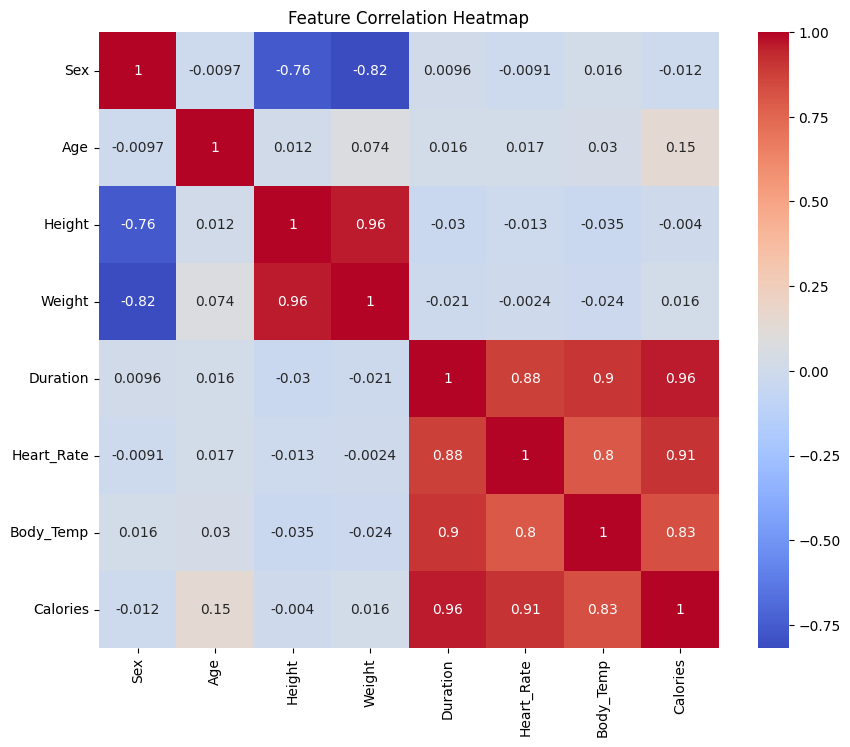

In [13]:
corr_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [14]:
train_data['HR_Zone'] = pd.cut(train_data['Heart_Rate'], bins=[50, 100, 140, 200], labels=['0', '1', '2'])
train_data['Duration_squared'] = train_data['Duration'] ** 2
train_data['HR_x_BodyTemp'] = train_data['Heart_Rate'] * train_data['Body_Temp']

In [15]:
test_data['HR_Zone'] = pd.cut(test_data['Heart_Rate'], bins=[50, 100, 140, 200], labels=['0', '1', '2'])
test_data['Duration_squared'] = test_data['Duration'] ** 2
test_data['HR_x_BodyTemp'] = test_data['Heart_Rate'] * train_data['Body_Temp']

In [16]:
train_data, test_data

(        Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  \
 0         0   36   189.0    82.0      26.0       101.0       41.0     150.0   
 1         1   64   163.0    60.0       8.0        85.0       39.7      34.0   
 2         1   51   161.0    64.0       7.0        84.0       39.8      29.0   
 3         0   20   192.0    90.0      25.0       105.0       40.7     140.0   
 4         1   38   166.0    61.0      25.0       102.0       40.6     146.0   
 ...     ...  ...     ...     ...       ...         ...        ...       ...   
 749995    0   28   193.0    97.0      30.0       114.0       40.9     230.0   
 749996    1   64   165.0    63.0      18.0        92.0       40.5      96.0   
 749997    0   60   162.0    67.0      29.0       113.0       40.9     221.0   
 749998    0   45   182.0    91.0      17.0       102.0       40.3     109.0   
 749999    1   39   171.0    65.0      19.0        97.0       40.6     103.0   
 
        HR_Zone  Duration_squared  HR_

In [17]:
X = train_data.drop(['Calories'], axis=1)
y = train_data['Calories']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
rf_params = {'n_jobs': -1,
             'n_estimators': 150,
             'min_samples_split': 2,
             'min_samples_leaf': 2,
             'max_features': 'log2',
             'max_depth': 20}

In [21]:
rf_model = RandomForestRegressor(**rf_params)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)
y_pred = rf_model.predict(X_test)
print(f"RandomForest → R²: {r2_score(y_test, y_pred):.4f}, RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

RandomForest → R²: 0.9964, RMSE: 3.71


In [22]:
test_ids = test_copy['id']
X_test_final = test_data


test_predictions = rf_model.predict(X_test_final)

submission = pd.DataFrame({
    'id': test_ids,
    'Calories': test_predictions
})
submission.to_csv('submission.csv', index=False)

In [23]:
submission

,id,Calories
0,750000,28.885476
1,750001,106.860317
2,750002,86.307603
3,750003,126.995271
4,750004,76.153669
...,...,...
249995,999995,25.226879
249996,999996,10.393804
249997,999997,73.433843
249998,999998,160.186079
